In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras import regularizers

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [8]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 784)               101136    
Total para

In [9]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.2503 - val_loss: 0.1713
Epoch 2/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1542 - val_loss: 0.1390
Epoch 3/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1330 - val_loss: 0.1244
Epoch 4/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1215 - val_loss: 0.1166
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1157 - val_loss: 0.1121
Epoch 6/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1122 - val_loss: 0.1092
Epoch 7/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1093 - val_loss: 0.1068
Epoch 8/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.1072 - val_loss: 0.1051
Epoch 9/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1051 - val_loss: 0.1

60000/60000 [==============================] - 3s 49us/step - loss: 0.0827 - val_loss: 0.0823
Epoch 78/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0826 - val_loss: 0.0822
Epoch 79/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0826 - val_loss: 0.0822
Epoch 80/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.0825 - val_loss: 0.0823
Epoch 81/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0825 - val_loss: 0.0823
Epoch 82/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0825 - val_loss: 0.0823
Epoch 83/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0825 - val_loss: 0.0824
Epoch 84/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0824 - val_loss: 0.0819
Epoch 85/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0824 - val_loss: 0.0821
Epoch 86/100
60000/60000 [========================

In [11]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

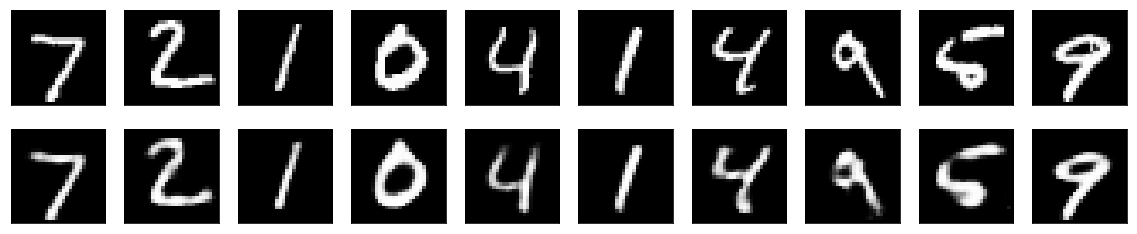

In [12]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()